### Rede neural 
Neste notebook será testado uma rede neural LSTM. O que isso significa é que há uma célula de mémoria que mantém a informação por mais tempo. 
O intuito disso é que o modelo consiga captar depêndencias e melhorar a classificação. 

### Importando as bibliotecas

In [47]:
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.layers import Embedding, Dense, Flatten
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

### Abrindo o dataset 

In [48]:
df_corpus = pd.read_csv('../output/word2vec_corpus.csv')
df_corpus.head(5)

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"['minuto', 'touro', 'ouro']",0.078066,-0.681861,-0.242816,-0.287935,-0.052421,0.331101,-0.139809,-0.379450,0.267952,...,-0.211810,0.132065,-0.106570,0.100519,0.056235,0.211425,0.015619,-0.055449,-0.076335,1
1,['sim'],0.219127,-0.408984,-0.176726,-0.270843,0.154609,0.169897,-0.016856,-0.248304,0.197370,...,-0.338304,0.263537,0.065959,0.021564,0.175807,0.181400,-0.136190,-0.056663,-0.056629,0
2,"['queria', 'saber', 'banking', 'própria']",0.139843,-0.536218,-0.217435,-0.219593,-0.017553,0.193954,-0.051410,-0.258538,0.166662,...,-0.251460,0.155440,-0.043917,0.123936,0.185161,0.097498,-0.046922,-0.040375,-0.083413,1
3,"['palmas', 'palmas', 'palmas', 'palmas']",0.146434,-0.234622,-0.173836,-0.255587,0.160331,0.161181,-0.023813,-0.191149,0.076497,...,-0.356565,0.168509,0.098124,0.088115,0.154685,0.217300,-0.187343,-0.033554,-0.157490,1
4,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",0.151519,-0.500928,-0.217571,-0.271197,-0.014306,0.233144,-0.057781,-0.306150,0.215858,...,-0.231650,0.143755,-0.044758,0.106567,0.123410,0.163982,-0.049926,-0.079451,-0.083599,1


### Aplicando o pré processamento do texto

In [49]:
# Definindo a váriavel alvo
target_var = df_corpus['sentimento']

In [50]:
# label encoding na coluna alvo
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_var)
encoded_labels

array([2, 1, 2, ..., 0, 0, 0], dtype=int64)

In [51]:
# Definindo o input 
input_var = df_corpus['Frase']

Nessa parte será feito o fit da entrada para que o modelo consiga aceitar esses dados.

In [52]:
max_words = 5000

# Tokenizando a coluna de entrada 
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(input_var)

x = tokenizer.texts_to_sequences(input_var)
x = pad_sequences(x, maxlen = 300)
y = encoded_labels

In [53]:
# Definindo as entradas de teste com 30% do dataset para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3)

### Modelo 
Nesta etapa é feito o modelo de rede neural, assim são definidos os parâmetros e o modelo é criado

In [58]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 128, input_length = 300))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [59]:
# Treinando o modelo com os dados de treino pré definidos e validando
history = model_lstm.fit(
    x_train,
    y_train,
    validation_data=(x_test,y_test) , 
    epochs = 10,
    batch_size = 512
)


Epoch 1/10
4/4 [==============================] - 175s 49s/step - loss: 1.5943 - accuracy: 0.3353 - val_loss: 1.5330 - val_accuracy: 0.4616
Epoch 2/10
4/4 [==============================] - 228s 59s/step - loss: 1.4694 - accuracy: 0.4512 - val_loss: 1.1929 - val_accuracy: 0.4616
Epoch 3/10
4/4 [==============================] - 215s 54s/step - loss: 1.1969 - accuracy: 0.4294 - val_loss: 1.0762 - val_accuracy: 0.5054
Epoch 4/10
4/4 [==============================] - 208s 54s/step - loss: 1.1222 - accuracy: 0.4053 - val_loss: 1.0515 - val_accuracy: 0.4616
Epoch 5/10
4/4 [==============================] - 322s 91s/step - loss: 1.0854 - accuracy: 0.4376 - val_loss: 1.0293 - val_accuracy: 0.4719
Epoch 6/10
4/4 [==============================] - 351s 89s/step - loss: 1.0391 - accuracy: 0.4924 - val_loss: 1.0223 - val_accuracy: 0.5044
Epoch 7/10
4/4 [==============================] - 362s 92s/step - loss: 1.0163 - accuracy: 0.5294 - val_loss: 0.9834 - val_accuracy: 0.5032
Epoch 8/10
4/4 [====

### Métricas do modelo
Aqui temos acesso as métricas do modelo e como o mesmo se comportou com o treinamento

In [60]:
# Resumo do modelo
model_lstm.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 128)          640000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 300, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                      

In [61]:
# Avaliando o modelo
model_lstm.evaluate(x_test, y_test)


124/124 [==============================] - 11s 90ms/step - loss: 0.8802 - accuracy: 0.5647


[0.8801738023757935, 0.5646584033966064]

In [62]:
# Criando as predições para testar a matriz 
y_pred = np.argmax(model_lstm.predict(x_test), axis=1)

124/124 [==============================] - 12s 90ms/step


In [63]:
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Acurácia do modelo ", acc)

Acurácia do modelo  0.5646584320645324


In [64]:
recall = sklearn.metrics.recall_score(y_pred, y_pred, average='weighted')
print("Recall do modelo ", recall)

Recall do modelo  1.0


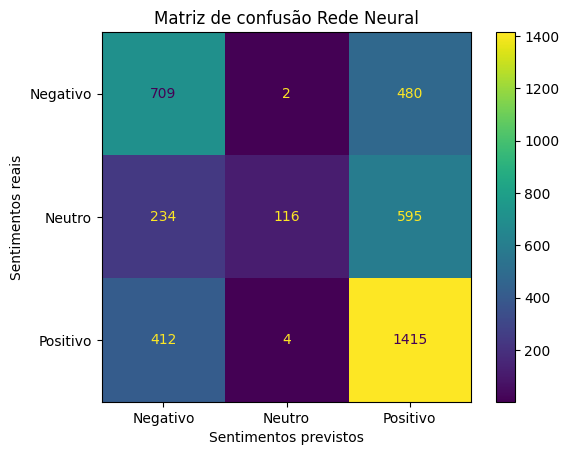

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix_corpus = metrics.confusion_matrix(y_test, y_pred)
cm_corpus = ConfusionMatrixDisplay(confusion_matrix_corpus, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_corpus.plot()
cm_corpus.ax_.set(
                title='Matriz de confusão Rede Neural', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()